<img src="minerva.jpg">

# <span style="color:blue">Escola Politécnica da Universidade de São Paulo</span>

## <span style="color:blue">PMR3508 - Reconhecimento de Padrões e Visão Computacional</span>

### <span style="color:blue">Atividade 3: Detector de Spam <span>


## 1. Exploração dos dados

### 1.1 Contato inicial com os dados

Nessa etapa, procuraremos ter o primeiro contato com os dados no sentido de conhecer as features que compõem o problema, bem como analisar a qualidade da base dados. 

In [1]:
import pandas as pd

df = pd.read_csv('train_data.csv')

In [2]:
df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.00,14.28,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,1.800,5,9,True,1947
1,0.00,0.00,1.00,0.0,0.50,0.00,0.00,0.00,0.0,0.50,...,0.357,0.000,0.892,0.000,0.000,2.000,19,172,False,2159
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.29,0.0,0.43,...,0.124,0.000,0.310,0.062,0.000,1.477,8,65,False,4223
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.444,0.000,0.000,2.800,7,28,True,2624
4,0.00,0.00,0.00,0.0,1.17,0.00,0.00,0.00,0.0,1.17,...,0.000,0.000,0.000,0.000,0.000,1.551,10,45,True,2743
5,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,True,3451
6,0.00,0.00,0.37,0.0,0.00,0.00,0.37,0.00,0.0,0.00,...,0.302,0.000,0.241,0.060,0.000,2.166,18,143,False,464
7,0.00,3.03,0.00,0.0,0.00,0.00,0.00,0.00,0.0,3.03,...,0.000,0.000,0.000,0.000,0.000,2.769,21,36,True,3219
8,0.09,0.00,0.48,0.0,0.00,0.29,0.00,0.00,0.0,0.09,...,0.030,0.000,0.000,0.046,0.000,1.722,17,267,True,3007
9,0.00,0.00,0.66,0.0,0.00,0.66,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,1.142,4,56,True,1549


Note que temos as features e a variável aleatória target. Note que nesse caso, a variável target diz se o email deve ser entendido como um spam ou não. Se Ham = true, o email não deve ser classificado como spam. Se Ham = false, o email deve ser classificado como spam.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 59 columns):
word_freq_make                3680 non-null float64
word_freq_address             3680 non-null float64
word_freq_all                 3680 non-null float64
word_freq_3d                  3680 non-null float64
word_freq_our                 3680 non-null float64
word_freq_over                3680 non-null float64
word_freq_remove              3680 non-null float64
word_freq_internet            3680 non-null float64
word_freq_order               3680 non-null float64
word_freq_mail                3680 non-null float64
word_freq_receive             3680 non-null float64
word_freq_will                3680 non-null float64
word_freq_people              3680 non-null float64
word_freq_report              3680 non-null float64
word_freq_addresses           3680 non-null float64
word_freq_free                3680 non-null float64
word_freq_business            3680 non-null float64
word_freq

A partir do método **info( )** verifica-se que a base de dados é uma maravilha! Não temos problemas de **missing data** e **as estruturas de dados parecem coerentes com o tipo de feature**. Ou seja, a princípio, não precisaremos fazer a etapa de limpeza de dados. 

### 1.2 Conhecendo melhor os dados usando estatística descritiva

Utilizaremos a abordagem de estatística descritiva para desenvolver a intuição acerca do problema. Para isso, faremos uso de recursos como medidas de posição, dispersão, bem como recursos visuais, como variados gráficos.



In [4]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.099677,0.223353,0.279019,0.069117,0.314897,0.096147,0.113372,0.107397,0.088519,0.242079,...,0.041071,0.138068,0.017707,0.273364,0.075168,0.043326,5.364929,52.831250,283.316304,2297.439674
std,0.298270,1.337420,0.508617,1.438505,0.697633,0.277443,0.400638,0.411901,0.265593,0.671435,...,0.257327,0.268595,0.111465,0.872148,0.239671,0.345457,33.811679,210.367337,623.433481,1324.109165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,34.000000,1160.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.280000,14.000000,93.000000,2298.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.191000,0.000000,0.313250,0.050000,0.000000,3.716000,43.000000,270.500000,3445.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,13.129000,1102.500000,9989.000000,15841.000000,4600.000000


Vamos plotar dois histogramas para comparar a frequência das features dos emails considerados spam e não spam.
Divideremos o DataFrame em dois: o grupo dos spams e o grupo dos não spams. Para os dois grupos, plotaremos o valor médio da frequência das features usando métodos de **NumPy** e **matplotlib**. Para separar o dataframe, podemos utilizar a funcionalidade **Query** do Pandas.



In [5]:
'''

Com o método Query, conseguimos dividir o dataframe filtrando-o pela variável target "ham";

'''

# Separando o dataframe (apenas emails não spam):

df_nospam = df.query('ham == 1')

# Separando o dataframe (apenas emails spam):

df_spam = df.query('ham == 0')

In [6]:
import numpy as np

# Calculando as médias de frequência do caractere $

nospam_cifrao_mean = np.mean(df_nospam['char_freq_$'])
spam_cifrao_mean = np.mean(df_spam['char_freq_$'])


Text(0.5,0,'Tipo de email')

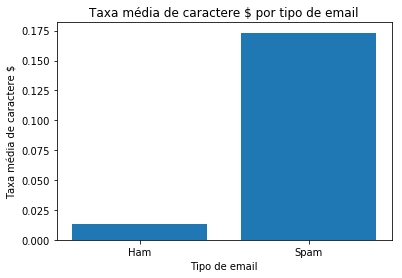

In [7]:
# Criando um histograma para comparar a frequência de $ em emails spam e não spam
from matplotlib import pyplot as plt

%matplotlib inline

locations = [1, 2]
heights = [nospam_cifrao_mean, spam_cifrao_mean]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa média de caractere $ por tipo de email')
plt.ylabel('Taxa média de caractere $')
plt.xlabel('Tipo de email')


Olha só que curioso... A taxa média do caractere $ nos emails classificados como spam é muito maior do que os emails classificados como não spam. Ou seja, encontramos uma feature que faz **muita** diferença na classificação.

- Agora vamos analisar a influência do caractere **"!"** no tipo de email.

Text(0.5,0,'Tipo de email')

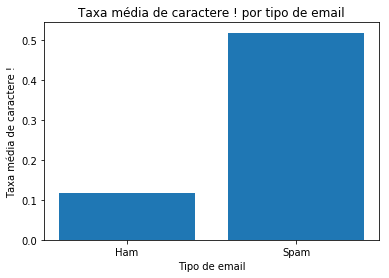

In [8]:
# Calculando as médias da taxa de frequẽncia do caractere "!"

nospam_exclamacao_mean = np.mean(df_nospam['char_freq_!'])
spam_exclamacao_mean = np.mean(df_spam['char_freq_!'])

# Gerando o gráfico
 
locations = [1, 2]
heights = [nospam_exclamacao_mean, spam_exclamacao_mean]
labels = ["Ham", "Spam"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Taxa média de caractere ! por tipo de email')
plt.ylabel('Taxa média de caractere !')
plt.xlabel('Tipo de email')


Novamente, identificamos uma feature que influência bastante na classificação do modelo. Como podemos observar no gráfico, a taxa de frequência média da exclamação em emails "spam" é aproximadamente 5x maior que em emails "não spam".

- Para termos um panorama geral da influência das features, vamos plotar um histograma para cada dataframe (spam e não spam) com todas as features!


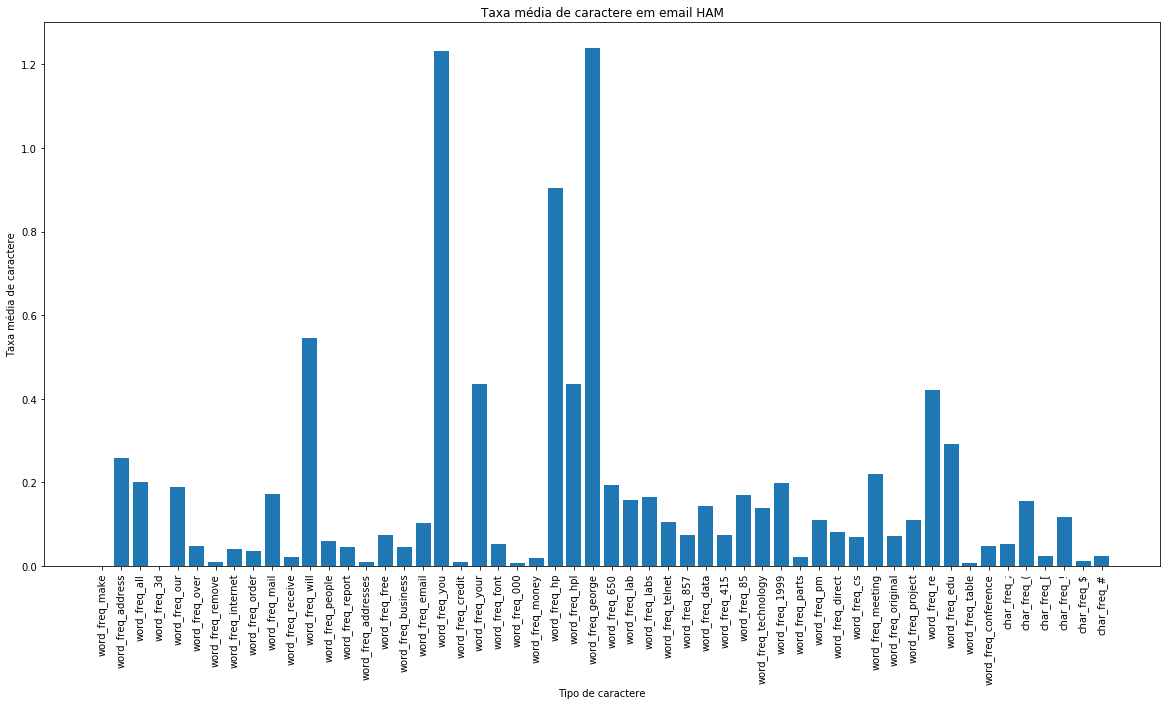

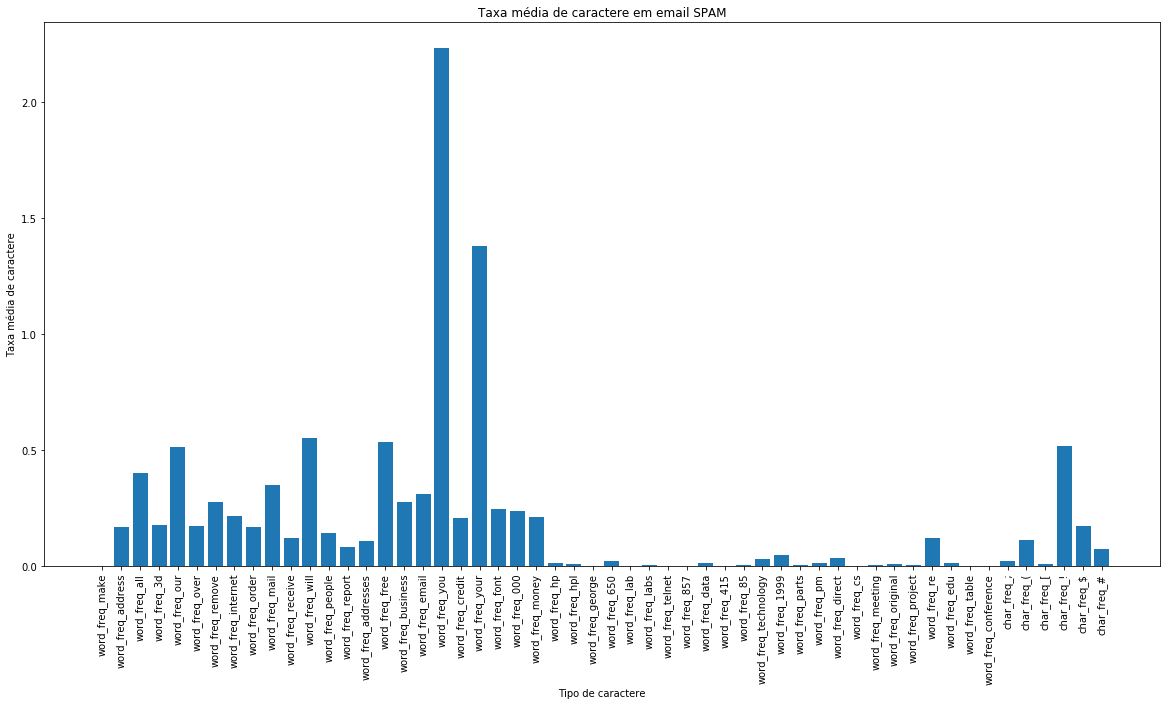

In [9]:
## PLOTANDO HISTOGRAMA PARA HAM

no_spam_means = np.zeros(shape=54)

for i in range(1, 54):

   nome = df_nospam.columns[i]
   no_spam_means[i] = np.mean(df_nospam[nome])

plt.figure(figsize=(20, 10))
locations = df_nospam.columns[:54]
heights = no_spam_means
plt.bar(locations, heights)
plt.title('Taxa média de caractere em email HAM')
plt.ylabel('Taxa média de caractere')
plt.xlabel('Tipo de caractere')
plt.xticks(df_nospam.columns[:54], rotation='vertical')

## PLOTANDO HISTOGRAMA PARA SPAM

spam_means = np.zeros(shape=54)

for i in range(1, 54):

   nome = df_spam.columns[i]
   spam_means[i] = np.mean(df_spam[nome])

plt.figure(figsize=(20, 10))
locations = df_spam.columns[:54]
heights = spam_means
plt.bar(locations, heights)
plt.title('Taxa média de caractere em email SPAM')
plt.ylabel('Taxa média de caractere')
plt.xlabel('Tipo de caractere')
plt.xticks(df_spam.columns[:54], rotation='vertical')

plt.show()

Analisando as features de forma geral, pode-se constatar que há palavras que praticamente definem se o email é spam ou não! Olha que curioso o caso da palavra George. A sua frequência em emails SPAM é praticamente nula, enquanto em HAM é uma das mais frequentes! Com os dados explicitados, mais features determinantes podem ser extraídas para criar mais intuição acerca do problema.

## 2. Aplicação do classificador e validação

Nessa etapa, escolheremos o classificador que melhor se encaixa para a solução do problema. Após a sua escolha, aplicaremos os métodos de avaliação de desempenho do classificador a fim de tomar decisões acerca do classificador e dos hiperparâmetros.

### 2.1 Classificador Naive-Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

Nessa etapa, separaremos o dataframe em features e targets, para gerar o modelo de treinamento com o método .fit().

In [11]:
features_train = df.drop(columns=['ham'])
target_train = df['ham']

Criaremos, aqui, o objeto referente ao Classificador Naive Bayes para distribuição normal de probabilidade.

In [12]:
gnb = GaussianNB()

gnb.fit(features_train, target_train)

GaussianNB(priors=None)

### 2.2 Validação do modelo

Como não temos um dataset de testes contendo targets, uma alternativa para validar nosso modelo com scores é a técnica de validação cruzada denominada K-fold. A técnica consiste em separar o dataset em K-grupos. Itera-se K vezes estes grupos, em que K-1 são bases de treino e 1 é base de treino. Assim, chega-se em 10 scores referentes ao desempenho do modelo.

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, features_train, target_train, cv=10)

print(scores)
print("\n")
print("A media da Validacao Cruzada eh: %s" % scores.mean())

[0.80216802 0.80163043 0.8125     0.86141304 0.82608696 0.83423913
 0.79347826 0.80434783 0.82880435 0.82833787]


A media da Validacao Cruzada eh: 0.8193005896339617


Após analisar a precisão do nosso classificador, tomamos a decisão se o modelo é satisfatório ou não.
A média de acurácia pela validação cruzada deu 0.82 (82%)! Parece satisfatório...

### 2.3 Gerando as predições do classificador de Bayes

Finalmente carregaremos as predições do nosso classificador a partir da base de testes fornecida pelo enunciado do problema. Após a predição, salvaremo-nas em um arquivo CSV e enviaremos ao Kaggle.

In [17]:
## Carregando a base de testes

df_test = pd.read_csv('test_features.csv')

## Realizando as predições

predictions = gnb.predict(df_test)

## salvando as predições num arquivo CSV

# corrigindo o formato de submissão

sample = pd.read_csv('sample_submission_1.csv')
submit = sample.drop(['ham'], axis = 1)
submit['ham'] = predictions
submit = submit.set_index('Id')

submit.to_csv('predictions.csv')

## 3. Referências

**Naive Bayes:** http://scikit-learn.org/stable/modules/naive_bayes.html

**Dividir dataset:** https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

**Validação cruzada:** http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html